In [1]:
from matplotlib import pylab as plt
from torchvision import models

In [2]:
from lucid_torch.image import ImageBatch
from lucid_torch.objectives import ChannelObjective
from lucid_torch.renderer import RendererBuilder

In [3]:
def perform_feature_vis(model, channel_fct, channel, n_steps, dev='cuda:0'):
    objective = ChannelObjective(channel_fct, channel=channel)
    imageBatch = ImageBatch.generate(width=224, height=224, batch_size=1, channels=3).to(dev)
    renderer = (RendererBuilder()
                .imageBatch(imageBatch)
                .model(model)
                .objective(objective)
                .build()
               )
    renderer.render(n_steps)
    img = renderer.drawableImageBatch().data[0].detach().cpu().permute(1, 2, 0).numpy()
    plt.imshow(img)
    return img

In [4]:
channel = 13
n_steps = 500

In [5]:
res50 = models.resnet50(pretrained=True)
res_early_conv = lambda m: m.layer1[-1].conv3


alex = models.alexnet(pretrained=True)
alex_early_conv = lambda m: m.features[3]


vgg16 = models.vgg16(pretrained=True)
vgg16_early_conv = lambda m: m.features[7]


densenet = models.densenet121(pretrained=True)
densenet_early_conv = lambda m: m.features.denseblock2


google = models.googlenet(pretrained=True)
google_early_conv = lambda m: m.inception3a.branch4[1].conv

Epoch 500, current loss: -72.486: 100%|██████████| 500/500 [00:15<00:00, 32.97it/s] 


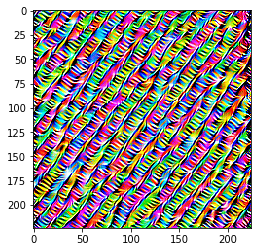

In [6]:
res_img = perform_feature_vis(res50, res_early_conv, channel=channel, n_steps=n_steps)

Epoch 500, current loss: -77790.781: 100%|██████████| 500/500 [00:06<00:00, 78.44it/s] 


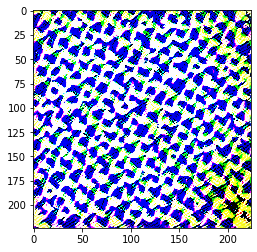

In [7]:
alex_img = perform_feature_vis(alex, alex_early_conv, channel=channel, n_steps=n_steps)

Epoch 500, current loss: -184828.5: 100%|██████████| 500/500 [00:09<00:00, 51.04it/s]  


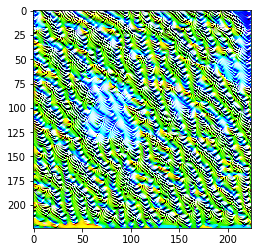

In [8]:
vgg_img = perform_feature_vis(vgg16, vgg16_early_conv, channel=channel, n_steps=n_steps)

Epoch 500, current loss: -1180.436: 100%|██████████| 500/500 [00:29<00:00, 16.79it/s]


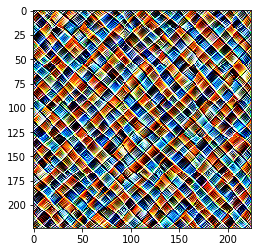

In [9]:
dense_img = perform_feature_vis(densenet, densenet_early_conv, channel=channel, n_steps=n_steps)

Epoch 500, current loss: -11506.834: 100%|██████████| 500/500 [00:16<00:00, 30.72it/s]


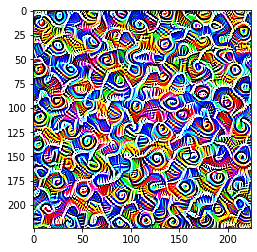

In [10]:
google_img = perform_feature_vis(google, google_early_conv, channel=channel, n_steps=n_steps)